<a href="https://colab.research.google.com/github/Sagor0078/AI/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [108]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [109]:
type(X_train)

numpy.ndarray

In [110]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [111]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [112]:
print(X_train[10].shape)

(28, 28)


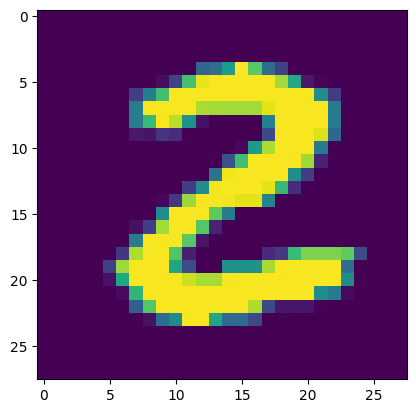

2


In [113]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

In [114]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [115]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [116]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [117]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [118]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [119]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [120]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3020 - accuracy: 0.9121
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1407 - accuracy: 0.9582
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1045 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0840 - accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0696 - accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0599 - accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0527 - accuracy: 0.9830
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0446 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0401 - accuracy: 0.9871
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.034

In [121]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0987 - accuracy: 0.9724
0.9724000096321106


In [126]:
print(X_test.shape)

(10000, 28, 28)


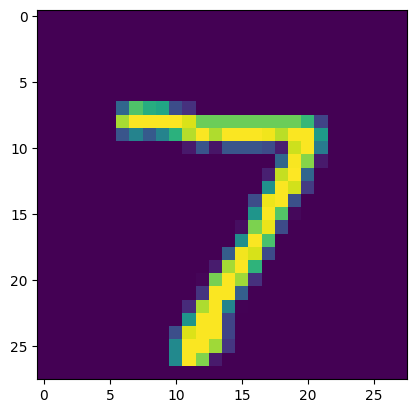

In [127]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [128]:
print(Y_test[0])

7


In [129]:

Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [130]:
print(Y_pred.shape)

(10000, 10)


In [131]:
print(Y_pred[0])

[1.8807876e-05 2.6554053e-04 4.3701228e-01 4.4506967e-02 5.9027758e-07
 5.9397791e-02 1.7741130e-09 9.9993753e-01 2.3667799e-02 6.6458080e-03]


In [132]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [133]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 5, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 8, 4, 2, 0, 7, 1, 1, 2, 1, 

In [134]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)


In [135]:


print(conf_mat)

tf.Tensor(
[[ 951    0    1    3    0    7    9    3    6    0]
 [   0 1125    1    0    0    1    2    2    4    0]
 [   2    2 1002    8    1    2    1    6    7    1]
 [   0    0    5  981    0    9    0    6    6    3]
 [   1    0    7    1  960    0    0    5    1    7]
 [   1    1    0    4    1  866    2    1   11    5]
 [   2    1    3    2    6   12  927    0    5    0]
 [   0    5   10    2    1    0    0  998    6    6]
 [   0    2    3    6    5    8    1    4  943    2]
 [   1    2    0    4    6    7    2    9    7  971]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

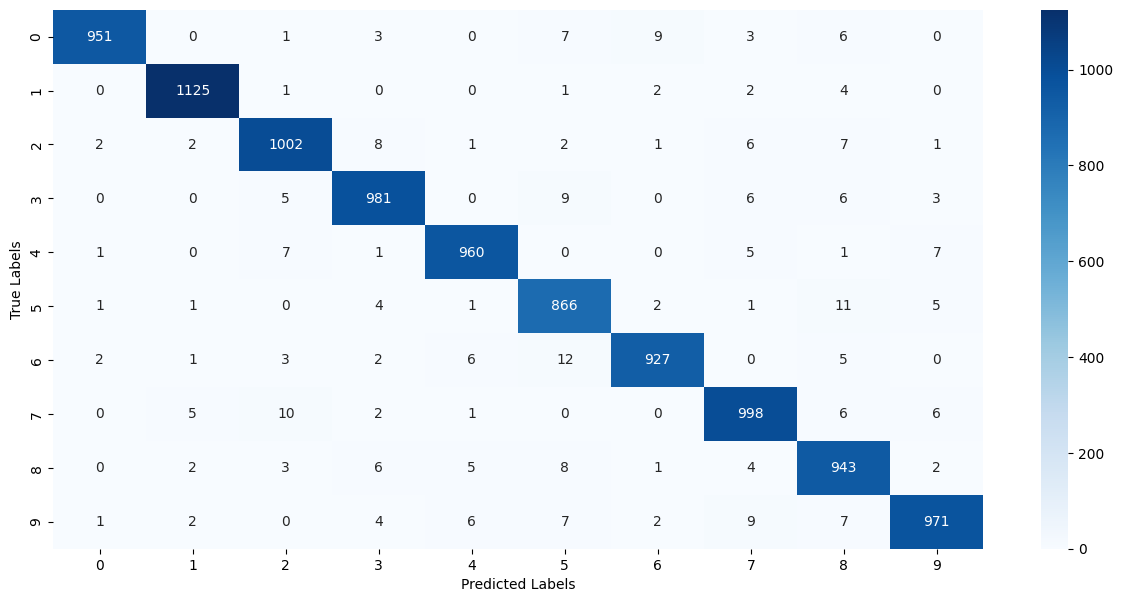

In [136]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [137]:
input_image_path = '/content/drive/MyDrive/mnist3.png'

input_image = cv2.imread(input_image_path)

In [138]:
type(input_image)

numpy.ndarray

In [139]:
print(input_image)

[[[143 143 143]
  [110 110 110]
  [113 113 113]
  ...
  [113 113 113]
  [ 95  95  95]
  [195 195 195]]

 [[110 110 110]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [182 182 182]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 ...

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]]


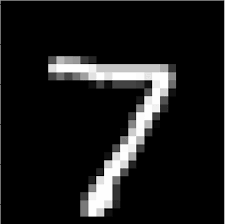

In [140]:
cv2_imshow(input_image)

In [141]:
input_image.shape

(224, 225, 3)

In [142]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [143]:
grayscale.shape

(224, 225)

In [144]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [145]:
input_image_resize.shape

(28, 28)

In [146]:
cv2_imshow(input_image_resize)

In [147]:
input_image_resize = input_image_resize/255

In [148]:
type(input_image_resize)

numpy.ndarray

In [149]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [150]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 30ms/step
[[1.8530391e-05 2.6437445e-04 4.3286735e-01 4.5517966e-02 6.2499447e-07
  5.6741070e-02 1.7664280e-09 9.9994016e-01 2.3065522e-02 6.9400249e-03]]


In [151]:
input_pred_label = np.argmax(input_prediction)

In [152]:
print(input_pred_label)

7


Path of the image to be predicted: /content/drive/MyDrive/mnist3.png


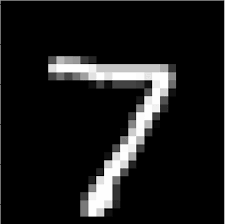

1/1 [==============================] - 0s 48ms/step
The Handwritten Digit is recognised as  7


In [153]:

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)